**Import all the required package**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers, optimizers
import matplotlib.image as mpimg
import math
import os
import warnings
warnings.filterwarnings('ignore')

**Setting directory paths and initializing parameters**

In [3]:
TRAIN_DIR =  r'C:\Users\madhu\Desktop\Skin Cancer\dataset1\Train'

BATCH_SIZE = 32
EPOCHS = 100

#ImageDataGenerator for training data
DATAGEN = ImageDataGenerator(
                rescale = 1.0/255,
                validation_split=0.2
                )

**Displaying Images of each classDisplaying Images of each class**

UnidentifiedImageError: cannot identify image file 'C:\\Users\\madhu\\Desktop\\Skin Cancer\\dataset1\\Train/Basal Cell Carcinoma(BCC)/desktop.ini'

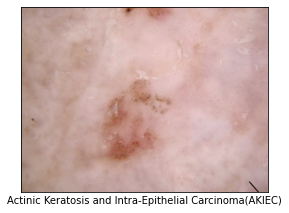

In [5]:
j=0
fig=plt.figure(figsize=(15, 15))
for i in os.listdir(TRAIN_DIR):
        img = mpimg.imread(TRAIN_DIR+"/"+i+"/"+os.listdir(TRAIN_DIR+"/"+i)[0])
        fig.add_subplot(2,3,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel(i)
        j += 1
plt.show()

**Image distribution of each class in training set**

In [4]:
print("TRAINING DATA:")
for i in os.listdir(TRAIN_DIR):
    files = os.listdir(TRAIN_DIR+"/"+i)
    print(f'{i} : {len(files)} files')

TRAINING DATA:
Actinic Keratosis and Intra-Epithelial Carcinoma(AKIEC) : 1012 files
Basal Cell Carcinoma(BCC) : 1013 files
Benign Keratosis(BKL) : 1013 files
Melanocytic Nevi(NV) : 1012 files
Melanoma(MEL) : 1013 files


**Preparing Data**

In [5]:
train_generator = DATAGEN.flow_from_directory(
                    TRAIN_DIR,
                    target_size = (224,224),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                    subset = 'training'
                  )

validation_generator = DATAGEN.flow_from_directory(
                    TRAIN_DIR,
                    target_size = (224,224),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                    subset = 'validation'
                  )

Found 4050 images belonging to 5 classes.
Found 1010 images belonging to 5 classes.


**VGG16 Architecture**

**Loading VGG16 Model and freezing all its layer**

In [6]:
conv_base = VGG19(
                weights = 'imagenet',
                include_top = False,
                input_shape = (224,224,3)
                 )

In [7]:
set_trainable = False
for layer in conv_base.layers:
    layer.trainable = False

**** Defining our model with it's own classifier on top of VGG16 convolutional base.********

In [9]:
model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())

# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))

# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(0.2))

model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=2e-5), metrics=['acc'])

In [14]:
history = model.fit_generator(
                                train_generator,
                                steps_per_epoch = train_generator.samples // BATCH_SIZE,
                                epochs = 3,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.samples // BATCH_SIZE,
                              )

Epoch 1/3
126/126 [==============================] - 748s 6s/step - loss: 1.6061 - acc: 0.2424 - val_loss: 1.5443 - val_acc: 0.3145
Epoch 2/3
126/126 [==============================] - 704s 6s/step - loss: 1.5212 - acc: 0.3176 - val_loss: 1.5154 - val_acc: 0.3065
Epoch 3/3
126/126 [==============================] - 900s 7s/step - loss: 1.4748 - acc: 0.3522 - val_loss: 1.4560 - val_acc: 0.3690


In [11]:
# def plot_acc_loss(history):

#     train_acc = history.history['acc']
#     val_acc = history.history['val_acc']
#     train_loss = history.history['loss']
#     val_loss = history.history['val_loss']

#     epochs = range(1, len(train_acc)+1)

#     plt.plot(epochs, train_acc, label='Training accuracy')
#     plt.plot(epochs, val_acc, label='Validation accuracy', color='red')
#     plt.title("Training and Validation Accuracy")
#     plt.legend()
#     plt.figure()

#     plt.plot(epochs, train_loss, label='Training loss')
#     plt.plot(epochs, val_loss, label='Validation loss', color='red')
#     plt.title("Training and Validation loss")
#     plt.legend()
#     plt.show()
    
#     print("\n\nAverage Training loss: ", np.mean(train_loss))
#     print(f"Average Training accuracy: {np.mean(train_acc)*100:.2f} %")
    
#     print("\n\n Average Validation loss: ", np.mean(val_loss))
#     print(f"Average Validation accuracy: {np.mean(val_acc)*100:.2f} %")

In [12]:
def plot_acc_loss(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    


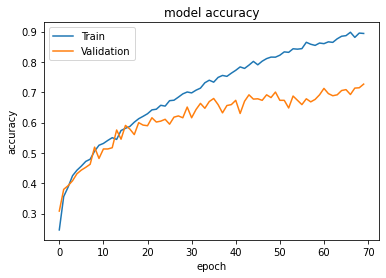

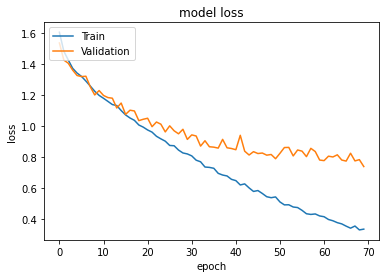

In [13]:
plot_acc_loss(history)

In [14]:
TEST_DIR =  '../input/skin-cancer-dataset/Split Skin Cancer dataset/Test'

In [15]:
test_generator = DATAGEN.flow_from_directory(
                    TEST_DIR,
                    target_size = (224,224),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                  )

Found 565 images belonging to 5 classes.


**Testset Accuracy before fine-tuning**

In [16]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy before fine tuning: {test_acc*100:.2f} %")

Test Accuracy before fine tuning: 71.51 %


**Fine Tuning**

In [17]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable = True
    if set_trainable == True:
        layer.trainable = True
    else:
        layer.trainable = False

In [18]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])
history = model.fit_generator(
                                train_generator,
                                steps_per_epoch = train_generator.samples // BATCH_SIZE,
                                epochs = EPOCHS,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.samples // BATCH_SIZE,
                             )

Epoch 1/70
126/126 [==============================] - 36s 278ms/step - loss: 0.3309 - acc: 0.8825 - val_loss: 0.8239 - val_acc: 0.7097
Epoch 2/70
126/126 [==============================] - 35s 277ms/step - loss: 0.2659 - acc: 0.9141 - val_loss: 0.7546 - val_acc: 0.7349
Epoch 3/70
126/126 [==============================] - 35s 277ms/step - loss: 0.2300 - acc: 0.9246 - val_loss: 0.7678 - val_acc: 0.7359
Epoch 4/70
126/126 [==============================] - 35s 275ms/step - loss: 0.1811 - acc: 0.9482 - val_loss: 0.7688 - val_acc: 0.7429
Epoch 5/70
126/126 [==============================] - 35s 276ms/step - loss: 0.1742 - acc: 0.9430 - val_loss: 0.7385 - val_acc: 0.7581
Epoch 6/70
126/126 [==============================] - 35s 275ms/step - loss: 0.1455 - acc: 0.9552 - val_loss: 0.7433 - val_acc: 0.7621
Epoch 7/70
126/126 [==============================] - 35s 280ms/step - loss: 0.1214 - acc: 0.9652 - val_loss: 0.8051 - val_acc: 0.7440
Epoch 8/70
126/126 [==============================] - 3

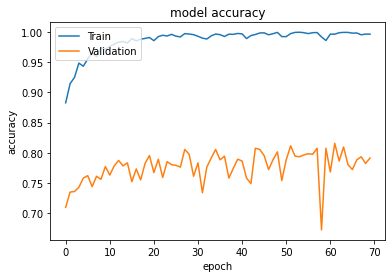

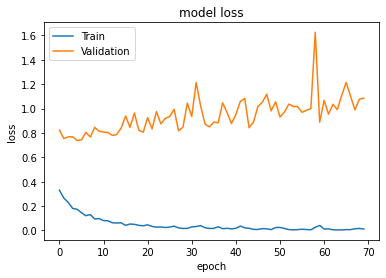

In [20]:
plot_acc_loss(history)

**Testset Accuracy after fine-tuning**

In [21]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy After fine tuning: {test_acc*100:.2f} %")

Test Accuracy After fine tuning: 80.70 %
